In [156]:
import torch
import numpy as np
from torch import nn
import random
import math
import matplotlib.pyplot as plt

In [157]:
import json
data = json.loads(open("dataset.json").read())
X_train = np.array(data["X"]).astype(np.double)
Y_train = np.array(data["Y"]).astype(np.double)

In [158]:
class BG(nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = nn.Linear(3, 2)
        self.act = nn.ReLU()
        self.l2 = nn.Linear(2, 2)
    
    def forward(self, x):
        x = self.l1(x)
        x = self.act(x)
        x = self.l2(x)
        return x
model = BG()

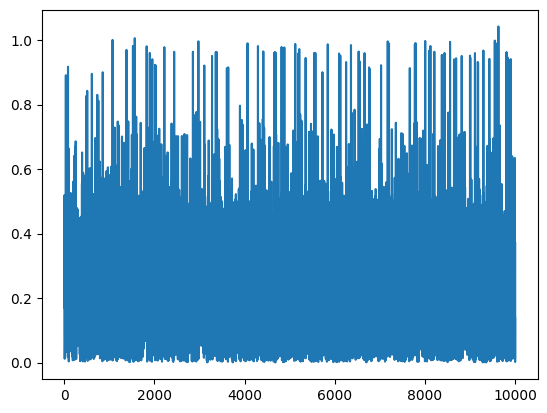

In [160]:
loss_function = nn.L1Loss()
optim = torch.optim.Adam(model.parameters(), lr=0.001)
loses = []
for i in range(10000):
    samp = math.floor(random.random()*len(X_train))
    input = torch.tensor(X_train[samp]).float()
    target = torch.tensor(Y_train[samp]).long()
    optim.zero_grad()
    guess = model(input)
    #print(f"guess: {guess}, target: {target}")
    loss = loss_function(guess, target)
    loss.backward()
    optim.step()
    loses.append(loss.item())
plt.plot(loses)